In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1) Future eng(data cleaning, missing data, data normalizong)
2) Naive model
3) loss functions
4) create neural network (*)

In [3]:
df = pd.read_csv('Rates.csv')

In [4]:
df

,Ամսաթիվ,EUR
03/01/2023,415.61,NaN
04/01/2023,418.95,NaN
05/01/2023,419.18,NaN
09/01/2023,421.43,NaN
10/01/2023,424.21,NaN
...,...,...
09/10/2023,425.44,NaN
10/10/2023,420.93,NaN
11/10/2023,419.01,NaN
12/10/2023,422.29,NaN


In [5]:
data = df['Ամսաթիվ'].values

In [6]:
y_t = data[1:]
y_t_1 = data[:-1]

In [7]:
df = pd.DataFrame(data= y_t,columns=['y_t_1'])

In [8]:
df['y_t'] = y_t

In [9]:
df

,y_t_1,y_t
0,418.95,418.95
1,419.18,419.18
2,421.43,421.43
3,424.21,424.21
4,425.58,425.58
...,...,...
191,425.44,425.44
192,420.93,420.93
193,419.01,419.01
194,422.29,422.29


In [10]:
df.corr()

,y_t_1,y_t
y_t_1,1.0,1.0
y_t,1.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('y_t',axis =1)
y = df['y_t']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [21]:
new_arr = np.array([423]).reshape(1,-1)
model.predict(new_arr)

array([423.])

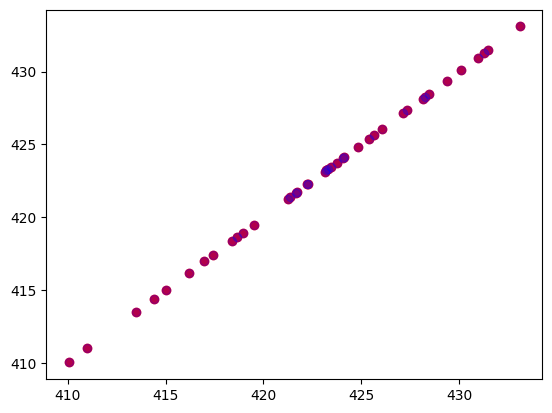

In [22]:
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color='blue',alpha=0.3)

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [24]:
import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

In [25]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X,y,epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 5ms/step - loss: 46593.9023
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.5387
Epoch 3/500
7/7 [==============================] - 0s 4ms/step - loss: 447.3464
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 3525.4861
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 1388.0447
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 1819.0442
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 1615.4720
Epoch 8/500
7/7 [==============================] - 0s 4ms/step - loss: 1790.3689
Epoch 9/500
7/7 [==============================] - 0s 4ms/step - loss: 1962.7173
Epoch 10/500
7/7 [==============================] - 0s 4ms/step - loss: 1193.1611
Epoch 11/500
7/7 [==============================] - 0s 5ms/step - loss: 1722.1661
Epoch 12/500
7/7 [==============================] - 0s 4ms/step - loss: 1418.8113
Epoch 13/500
7/7 [==========

7/7 [==============================] - 0s 0s/step - loss: 492.5695
Epoch 399/500
7/7 [==============================] - 0s 3ms/step - loss: 466.3400
Epoch 400/500
7/7 [==============================] - 0s 0s/step - loss: 474.3461
Epoch 401/500
7/7 [==============================] - 0s 223us/step - loss: 474.8595
Epoch 402/500
7/7 [==============================] - 0s 3ms/step - loss: 471.4927
Epoch 403/500
7/7 [==============================] - 0s 0s/step - loss: 476.8765
Epoch 404/500
7/7 [==============================] - 0s 3ms/step - loss: 473.6430
Epoch 405/500
7/7 [==============================] - 0s 0s/step - loss: 468.5322
Epoch 406/500
7/7 [==============================] - 0s 0s/step - loss: 470.1133
Epoch 407/500
7/7 [==============================] - 0s 3ms/step - loss: 474.0581
Epoch 408/500
7/7 [==============================] - 0s 0s/step - loss: 465.6935
Epoch 409/500
7/7 [==============================] - 0s 3ms/step - loss: 468.7308
Epoch 410/500
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 432.6936
Epoch 498/500
7/7 [==============================] - 0s 0s/step - loss: 432.5178
Epoch 499/500
7/7 [==============================] - 0s 674us/step - loss: 430.9160
Epoch 500/500
7/7 [==============================] - 0s 2ms/step - loss: 425.5587


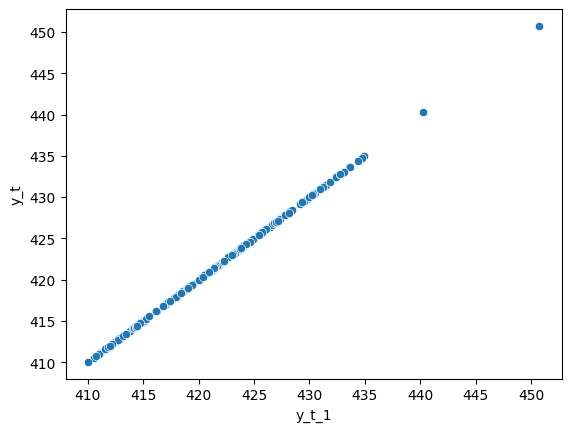

In [26]:
sns.scatterplot(x='y_t_1',y='y_t',data=df)
plt.show()